# Проектная работа

Анисимов Максим ИУ10-56

### Type

Регрессия

### dataset

Boston Housing Data Set

### dataset_url

https://www.kaggle.com/datasets/schirmerchad/bostonhoustingmlnd

### method

Линейная регрессия

## Регрессия
Регрессия — это статистический метод, используемый для изучения отношений между зависимой переменной (целевой переменной) и одной или несколькими независимыми переменными (признаками). Этот метод часто используется для прогнозирования или описания значения зависимой переменной на основе значений одной или нескольких независимых переменных.

Основная цель регрессии — понять характер связи между переменными и использовать эту информацию для предсказания будущих значений зависимой переменной при изменении независимых переменных. Математически, регрессия представляется уравнением, которое описывает линейную или нелинейную связь между переменными.

Два основных типа регрессии:

1) Линейная регрессия:

    - Используется, когда существует линейная связь между зависимой и независимыми переменными.
    - Цель состоит в поиске линии (или гиперплоскости в пространствах с более чем одной независимой переменной), которая наилучшим образом соответствует данным.
1) Логистическая регрессия:

    - Используется, когда зависимая переменная представляет собой категориальную (бинарную или многокатегориальную) переменную.
    - Используется для прогнозирования вероятности принадлежности к какому-то классу.
Регрессионные методы широко применяются в различных областях, включая экономику, финансы, биологию, медицину, социологию и многие другие.

## О наборе данных

Набор данных для этого проекта взят из хранилища машинного обучения UCI. Данные о жилье в Бостоне были собраны в 1978 году, и каждая из 506 записей представляет собой агрегированные данные о 14 характеристиках домов из различных пригородов Бостона, штат Массачусетс.

## Линейная регрессия
Линейная регрессия — это метод в статистике и машинном обучении, используемый для оценки линейной зависимости между зависимой переменной (целевой переменной) и одной или несколькими независимыми переменными (признаками). Основная идея линейной регрессии заключается в поиске линии (или гиперплоскости в пространствах с более чем одной независимой переменной), которая лучше всего соответствует набору данных.

### Принцип работы линейной регрессии:
1) Линейная модель:
    - Модель линейной регрессии предполагает, что зависимость между переменными является линейной, то есть может быть представлена уравнением прямой или гиперплоскости в пространствах с несколькими признаками.
    
2) Минимизация ошибки:
    - Цель — минимизировать сумму квадратов разностей между реальными и предсказанными значениями. Это называется методом наименьших квадратов.

3) Коэффициенты регрессии:
    - Алгоритм находит коэффициенты (веса) при каждой независимой переменной так, чтобы минимизировать ошибку модели.
    
4) Предсказание:
    - После обучения модели можно использовать ее для предсказания значений зависимой переменной на основе новых данных.

### Уравнение линейной регрессии:
Для простой линейной регрессии (одна независимая переменная) уравнение выглядит следующим образом:

$Y = \mathrm{\beta}_{0} + \mathrm{\beta}_{1}X + \varepsilon$
где:
- $Y$ — зависимая переменная (целевая переменная),
- $X$ — независимая переменная (признак),
- $\mathrm{\beta}_{0}$ — интерсепт (свободный член), коэффициент при $\mathrm{X}_{0}$ = 1,
- $\mathrm{\beta}_{1}$ — коэффициент при $X$,
- $\varepsilon$ — ошибка, неучтенные факторы, случайная компонента.

#### Пример:
Предположим, у нас есть данные о площади квартир ($X$) и их стоимости ($Y$). Мы хотим построить модель линейной регрессии.

Стоимость = $\mathrm{\beta}_{0} + \mathrm{\beta}_{1} * Площадь + \varepsilon$

Модель будет пытаться подобрать значения $\mathrm{\beta}_{0}$ и $\mathrm{\beta}_{1}$, чтобы минимизировать ошибку предсказания стоимости квартир.

Линейная регрессия является одним из наиболее простых и широко используемых методов в машинном обучении и статистике.

In [4]:
!pip install scikit-learn

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Your data
data = """RM,LSTAT,PTRATIO,MEDV
6.575,4.98,15.3,504000.0
6.421,9.14,17.8,453600.0
7.185,4.03,17.8,728700.0
6.998,2.94,18.7,701400.0
7.147,5.33,18.7,760200.0
6.43,5.21,18.7,602700.0
6.012,12.43,15.2,480900.0
6.172,19.15,15.2,569100.0
5.631,29.93,15.2,346500.0
6.004,17.1,15.2,396900.0
6.377,20.45,15.2,315000.0
6.009,13.27,15.2,396900.0
5.889,15.71,15.2,455700.0
5.949,8.26,21.0,428400.0
6.096,10.26,21.0,382200.0
5.834,8.47,21.0,417900.0
5.935,6.58,21.0,485100.0
5.99,14.67,21.0,367500.0
5.456,11.69,21.0,424200.0
5.727,11.28,21.0,382200.0
5.57,21.02,21.0,285600.0"""

# Convert data to DataFrame
df = pd.read_csv(pd.io.common.StringIO(data))

# Split data into features (X) and target variable (y)
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Display the coefficients of the model
print('Coefficients:')
for feature, coef in zip(X.columns, model.coef_):
    print(f'{feature}: {coef}')

# Display the intercept
print(f'Intercept: {model.intercept_}')


Mean Squared Error: 10014671648.126432
R-squared: -2.0671266889278557
Coefficients:
RM: 146586.36839774143
LSTAT: -11880.191752567462
PTRATIO: -8736.506222401085
Intercept: -123300.84320057544


1) Среднеквадратичная ошибка (MSE):
    - Среднеквадратичная ошибка - это мера того, насколько хорошо прогнозы модели соответствуют фактическим значениям. Рассчитывается как среднее квадратов разностей между предсказанными и фактическими значениями.
    - В нашем случае MSE довольно высока (1,001 * $10^{10}$), что указывает на большие ошибки в прогнозах модели.

2) R-квадрат ($R^2$):
    - R-квадрат - это статистическая мера того, насколько хорошо модель объясняет изменчивость зависимой переменной (целевой переменной).
    - Значения R-квадрата варьируются от 0 до 1, где 1 указывает на идеальное соответствие. Отрицательное значение R-квадрата говорит о том, что модель плохо соответствует данным.
    - В нашем случае R-квадрат отрицателен (-2,067). Это не хороший знак и обычно указывает на то, что модель не подходит для данных.

3) Коэффициенты:
    - Коэффициенты представляют веса, присвоенные каждому признаку моделью. Они указывают на силу и направление связи между каждым признаком и целевой переменной.
    - Например, коэффициент для RM положителен (146586.37), что указывает на то, что увеличение среднего количества комнат (RM) связано с увеличением целевой переменной (MEDV).
    - Напротив, коэффициенты для LSTAT и PTRATIO отрицательны, что указывает на то, что увеличение процента населения с низким статусом (LSTAT) и соотношения учеников и учителей (PTRATIO) связано с уменьшением MEDV.
    - Интерсепт - это значение целевой переменной, когда все признаки равны нулю.
    
Высокая MSE и отрицательный R-квадрат указывают на то, что модель линейной регрессии может не подходить для прогнозирования целевой переменной (MEDV) на основе предоставленных признаков (RM, LSTAT, PTRATIO)

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Your data
data = pd.read_csv('dataset/housing.csv')

# Convert data to DataFrame
df = data

# Split data into features (X) and target variable (y)
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Display the coefficients of the model
print('Coefficients:')
for feature, coef in zip(X.columns, model.coef_):
    print(f'{feature}: {coef}')

# Display the intercept
print(f'Intercept: {model.intercept_}')


Mean Squared Error: 6789025559.265895
R-squared: 0.6910934003098509
Coefficients:
RM: 87322.20361861192
LSTAT: -10620.637315223681
PTRATIO: -19324.41029649926
Intercept: 408027.6541680779


1) Среднеквадратичная ошибка (MSE):
    - MSE по-прежнему является мерой того, насколько хорошо прогнозы модели соответствуют фактическим значениям. Однако в данном случае она уже меньше (6,789,025,559), что свидетельствует о более низких ошибках в прогнозах по сравнению с предыдущим случаем.
    
2) R-квадрат ($R^2$):
    - R-квадрат теперь положителен (0,691), что указывает на то, что модель лучше соответствует данным, чем в предыдущем случае. Значение близкое к 1 говорит о том, что модель хорошо объясняет изменчивость целевой переменной.
    
3) Коэффициенты:
    - Коэффициенты указывают на силу и направление связи между каждым признаком и целевой переменной.
    - Коэффициент для RM по-прежнему положителен (87,322), что указывает на положительную связь между средним количеством комнат и целевой переменной.
    - Коэффициенты для LSTAT и PTRATIO также остались отрицательными, что указывает на то, что увеличение процента населения с низким статусом и соотношения учеников и учителей связано с уменьшением целевой переменной.
    - Интерсепт (Intercept) - это значение целевой переменной, когда все признаки равны нулю.
    
Таким образом, с уменьшением MSE и увеличением R-квадрата, ваша модель лучше объясняет изменчивость целевой переменной (MEDV).

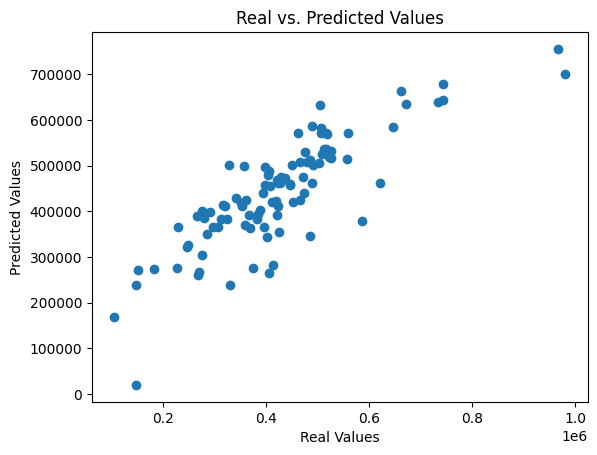

Mean Squared Error: 6789025559.265895
R-squared: 0.6910934003098509

Coefficients:
     Feature    Coefficient
0         RM   87322.203619
1      LSTAT  -10620.637315
2    PTRATIO  -19324.410296
0  Intercept  408027.654168


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Загрузка данных из файла
data = pd.read_csv('dataset/housing.csv')

# Разделение данных на признаки (X) и целевую переменную (y)
X = data[['RM', 'LSTAT', 'PTRATIO']]
y = data['MEDV']

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация модели линейной регрессии
model = LinearRegression()

# Обучение модели на тренировочных данных
model.fit(X_train, y_train)

# Получение предсказаний на тестовых данных
y_pred = model.predict(X_test)

# Оценка результатов
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод коэффициентов регрессии
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
intercept = pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [model.intercept_]})

# Визуализация предсказанных vs. реальных значений
plt.scatter(y_test, y_pred)
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.title("Real vs. Predicted Values")
plt.show()

# Вывод результатов
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print("\nCoefficients:")
print(pd.concat([coefficients, intercept]))


1) $\color{black}{\text{Mean Squared Error (MSE):}}$ Это метрика, которая измеряет среднеквадратичное отклонение предсказанных значений от фактических. Чем меньше значение MSE, тем лучше. В данном случае, MSE равно 6,789,025,559.27, что означает, что среднеквадратичное отклонение предсказанных значений от фактических в квадрате составляет примерно 6,789,025,559.27.

2) $\color{black}{\text{R-squared ($R^2$):}}$ Это коэффициент детерминации, который представляет собой долю дисперсии зависимой переменной, объясненную моделью. Значение $R^2$ находится в пределах от 0 до 1, где 1 означает, что модель идеально объясняет изменчивость данных. В данном случае, $R^2$ равно 0.691, что означает, что модель объясняет примерно 69.1% изменчивости зависимой переменной.

3) $\color{black}{\text{Coefficients (Коэффициенты):}}$ Каждый коэффициент представляет вклад соответствующего признака в предсказание.

    - RM (среднее количество комнат на дом): Положительный коэффициент (87,322) говорит о том, что увеличение среднего количества комнат на доме положительно влияет на цену.

    - LSTAT (процент населения низкого статуса): Отрицательный коэффициент (-10,620) говорит о том, что увеличение процента населения низкого статуса негативно влияет на цену.

    - PTRATIO (соотношение учеников и учителей): Отрицательный коэффициент (-19,324) указывает на то, что увеличение соотношения учеников и учителей также негативно влияет на цену.

    - Intercept (Перехват): Это свободный член, который представляет базовое значение цены, когда все остальные признаки равны нулю.

В целом, модель предсказывает цену дома, исходя из этих трех признаков. Каждый коэффициент указывает на направление и силу влияния соответствующего признака на цену дома.